In [1]:
#importing all the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#reading the csv file and finding out the names of the columns
df = pd.read_csv("C:/Users/madhumitha/Downloads/TrainDatasetStockPrice.csv")
df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [3]:
df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987851
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [4]:
#importing the test dataset
df_test = pd.read_csv("C:/Users/madhumitha/Downloads/TestDatasetStockPrice.csv")
df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [5]:
#checking for null values
df.isnull().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

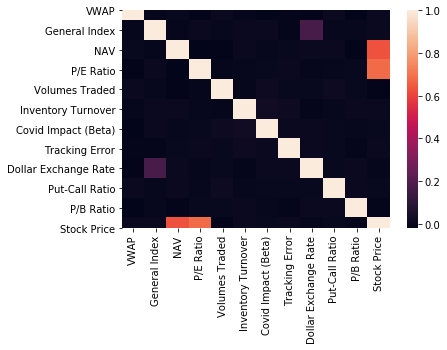

In [6]:
#checking the correlation 
corr_df=df.corr()
corr_df
sns.heatmap(corr_df)

In [7]:
#imputing null values
df["Inventory Turnover"].fillna(df["Inventory Turnover"].mean(), inplace=True)
df["Covid Impact (Beta)"].fillna(df["Covid Impact (Beta)"].mean(), inplace=True)

In [8]:
#final cleaning of training data
df= df.dropna()
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [9]:
#cleaning test data
df_test = df_test.dropna()
df_test = df_test.replace([np.inf, -np.inf], np.nan)
df_test = df_test.dropna()

In [10]:
#featurisation of test data
x_actual_test = df_test[['VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
#np.reshape(y,2103,1)
print(x_actual_test.shape)

(2415, 11)


In [11]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import yellowbrick 


In [12]:
#featurisation
x = df[['VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
y = df['Stock Price']
#np.reshape(y,2103,1)
print(x.shape)
print(y.shape)

(6896, 11)
(6896,)


In [13]:
#training and evaluating the model with VALIDATION SPLIT OF 25%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)
y_pred = model_linear.predict(x_test)
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R^2 :" , r2_score(y_test,y_pred))

RMSE : 135.9793517133136
R^2 : 0.8949651019079787


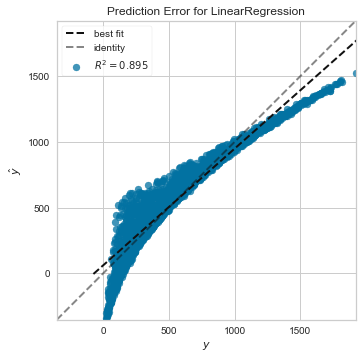

In [14]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(model_linear)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof();

In [15]:
#LINEAR REGRESSION PREDICTION
y_linear_actual_pred = model_linear.predict(x_actual_test)

In [16]:
y_linear_actual_pred

array([ 868.43696171,  409.38193875, 1306.00525176, ...,  187.44488658,
        590.00971216, 1152.85488119])

RMSE: 3.4455789994914623
R^2: 0.9999325608466643


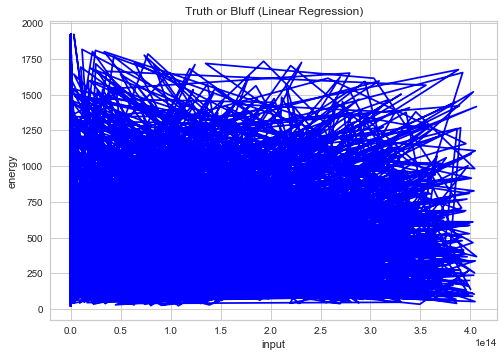

In [17]:
#SINCE THE POLYNOMIAL REGRESSION OF ORDER 2 GIVES A BETTER ACCURACY , WE TAKE THAT MODEL INTO ACCOUNT
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =1)
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly_train = poly_reg.fit_transform(x_train)
model = LinearRegression()
model.fit(x_poly_train, y_train)


x_poly_test = poly_reg.fit_transform(x_test)
y_poly_pred = model.predict((x_poly_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_poly_pred)))
print("R^2:",r2_score(y_test,y_poly_pred))

# Visualizing the Polymonial Regression results
def viz_polynomial():
    plt.plot(x_test, y_test, color='red')
    plt.plot(x_poly_test, y_poly_pred, color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('input')
    plt.ylabel('energy')
    plt.show()
    return

viz_polynomial() 

In [18]:
df_test = df_test.dropna()
df_test = df_test.replace([np.inf, -np.inf], np.nan)
df_test = df_test.dropna()

In [19]:
#featurisation
x_actual_test = df_test[['VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
#np.reshape(y,2103,1)
print(x_actual_test.shape)

(2415, 11)


In [20]:
#POLYNOMIAL REGRESSION PREDICTION
x_poly_actual_test = poly_reg.fit_transform(x_actual_test)
y_poly_actual_pred= model.predict((x_poly_actual_test))

In [21]:
print(y_poly_actual_pred)

[ 810.59940121  257.95263391 1555.03857677 ...  136.50116662  348.52270827
 1304.86596024]


In [22]:
result = pd.DataFrame(y_poly_actual_pred)

In [23]:
#having the values inside a dataframe
result.index = df_test['Stock Index'] 
result

,0
Stock Index,
AC3235,810.599401
AC3236,257.952634
AC3237,1555.038577
AC3238,832.490474
AC3241,725.215907
...,...
AD2732,68.897417
AD2733,1125.147853
AD2734,136.501167


In [ ]:
 #I have taken the polynomial prediction for prediction for better accuracy

In [ ]:
#converting the dataframe values to a csv file 
result1.to_csv('flipr_pred_of_stockprices.csv')